<a href="https://colab.research.google.com/github/AjanEshwara/AirTrafficSim/blob/main/Group_50_CRWK_CN7030.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning on Big Data (CN7030) CRWK 24-25 Term B [60% weighting]**
# **Group ID: 50**
1.   Student 1: Walgama Eshwarage Don Ajan Sajuka Eshwara - U2782761
2.   Student 2: Safiat Alli-adeniji - U2803147
---

**About Data Set**

This data set includes detailed airline, weather, airport, and employment information. Using this data set, group 50's goal is to find the flight delay. This data set includes 2019 full year monthly data collection.


# **Initiate and Configure Spark**

In [65]:
# add your code here

!pip3 install pyspark


In [66]:
#Linking with pyspark
import pyspark
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .master("local[*]") \
    .appName("Group_50_CRWK") \
    .config("spark.executor.memory","4g")\
    .config("spark.driver.memory", "2g")\
    .config("spark.executor.cores", "2") \
    .config("spark.sql.inMemoryColumnarStorage.compressed", "true") \
    .getOrCreate()
spark

In [67]:
#connect with google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
# **Task 1 - Data Loading and Preprocessing (15 marks)**
---

In [68]:
#Ajan
from os import truncate
##1st student name:
# Create CSV data frame
df = spark.read.format('csv').load('/content/drive/MyDrive/full_data_flightdelay.csv', inferSchema = True, header = True)

#Show table
df.show(truncate=False)

#Show schema
df.printSchema()

#Data count and Number of columns
print(df.count())
print(len(df.columns))

+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+----------------------+---------------------+---------------------+-----------------------------+------------------------+------------------------+-----------------------+---------------------+---------+----------------------+--------+---------+----------------+----+----+----+----+----+
|MONTH|DAY_OF_WEEK|DEP_DEL15|DEP_TIME_BLK|DISTANCE_GROUP|SEGMENT_NUMBER|CONCURRENT_FLIGHTS|NUMBER_OF_SEATS|CARRIER_NAME          |AIRPORT_FLIGHTS_MONTH|AIRLINE_FLIGHTS_MONTH|AIRLINE_AIRPORT_FLIGHTS_MONTH|AVG_MONTHLY_PASS_AIRPORT|AVG_MONTHLY_PASS_AIRLINE|FLT_ATTENDANTS_PER_PASS|GROUND_SERV_PER_PASS |PLANE_AGE|DEPARTING_AIRPORT     |LATITUDE|LONGITUDE|PREVIOUS_AIRPORT|PRCP|SNOW|SNWD|TMAX|AWND|
+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+----------------------+---------------------+---------------------+-----------------------------+------

In [69]:
df.rdd.getNumPartitions()

2

In [70]:
df = df.repartition(12)
df.rdd.getNumPartitions()

12

In [71]:
from pyspark.sql.functions import col, isnan, when, count

# Check for null or NaN values in each column
df.select([count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df.columns]).show()


+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+------------+---------------------+---------------------+-----------------------------+------------------------+------------------------+-----------------------+--------------------+---------+-----------------+--------+---------+----------------+----+----+----+----+----+
|MONTH|DAY_OF_WEEK|DEP_DEL15|DEP_TIME_BLK|DISTANCE_GROUP|SEGMENT_NUMBER|CONCURRENT_FLIGHTS|NUMBER_OF_SEATS|CARRIER_NAME|AIRPORT_FLIGHTS_MONTH|AIRLINE_FLIGHTS_MONTH|AIRLINE_AIRPORT_FLIGHTS_MONTH|AVG_MONTHLY_PASS_AIRPORT|AVG_MONTHLY_PASS_AIRLINE|FLT_ATTENDANTS_PER_PASS|GROUND_SERV_PER_PASS|PLANE_AGE|DEPARTING_AIRPORT|LATITUDE|LONGITUDE|PREVIOUS_AIRPORT|PRCP|SNOW|SNWD|TMAX|AWND|
+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+------------+---------------------+---------------------+-----------------------------+------------------------+-----------------------

In [72]:
#Missing values are negligible so we can drop that values.
df = df.na.drop()


In [73]:
# We can check whether null values are droped or not
df.select([count(when(col(c).isNull() | isnan(col(c)), c)).alias(c) for c in df.columns]).show()

+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+------------+---------------------+---------------------+-----------------------------+------------------------+------------------------+-----------------------+--------------------+---------+-----------------+--------+---------+----------------+----+----+----+----+----+
|MONTH|DAY_OF_WEEK|DEP_DEL15|DEP_TIME_BLK|DISTANCE_GROUP|SEGMENT_NUMBER|CONCURRENT_FLIGHTS|NUMBER_OF_SEATS|CARRIER_NAME|AIRPORT_FLIGHTS_MONTH|AIRLINE_FLIGHTS_MONTH|AIRLINE_AIRPORT_FLIGHTS_MONTH|AVG_MONTHLY_PASS_AIRPORT|AVG_MONTHLY_PASS_AIRLINE|FLT_ATTENDANTS_PER_PASS|GROUND_SERV_PER_PASS|PLANE_AGE|DEPARTING_AIRPORT|LATITUDE|LONGITUDE|PREVIOUS_AIRPORT|PRCP|SNOW|SNWD|TMAX|AWND|
+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+------------+---------------------+---------------------+-----------------------------+------------------------+-----------------------

we have confirmed that missing values have droped.


In [74]:
df.groupBy("DEP_DEL15").count().show()

+---------+-----+
|DEP_DEL15|count|
+---------+-----+
|        1|11112|
|        0|48473|
+---------+-----+



In [75]:
#major_df = df.filter(col("DEP_DEL15") == 0)
#minor_df = df.filter(col("DEP_DEL15") == 1)
#ratio = int(major_df.count()/minor_df.count())
#print("ratio: {}".format(ratio))

In [76]:
#sampled_majority_df = major_df.sample(False, 1/ratio)
#df = sampled_majority_df.unionAll(minor_df)
#df.groupBy("DEP_DEL15").count().show()

In [77]:
#import logistics regression
#from pyspark.ml.classification import LogisticRegression
#from pyspark.ml.evaluation import MulticlassClassificationEvaluator
#from pyspark.sql import functions as F

#lr = LogisticRegression(weightCol="weight")
#balanced_df = df.withColumn("weight", F.when(F.col("DEP_DEL15") == 1, 10.0).otherwise(1.0))

In [78]:
# Check the data types of the columns
df.dtypes

[('MONTH', 'int'),
 ('DAY_OF_WEEK', 'int'),
 ('DEP_DEL15', 'int'),
 ('DEP_TIME_BLK', 'string'),
 ('DISTANCE_GROUP', 'int'),
 ('SEGMENT_NUMBER', 'int'),
 ('CONCURRENT_FLIGHTS', 'int'),
 ('NUMBER_OF_SEATS', 'int'),
 ('CARRIER_NAME', 'string'),
 ('AIRPORT_FLIGHTS_MONTH', 'int'),
 ('AIRLINE_FLIGHTS_MONTH', 'int'),
 ('AIRLINE_AIRPORT_FLIGHTS_MONTH', 'int'),
 ('AVG_MONTHLY_PASS_AIRPORT', 'int'),
 ('AVG_MONTHLY_PASS_AIRLINE', 'int'),
 ('FLT_ATTENDANTS_PER_PASS', 'double'),
 ('GROUND_SERV_PER_PASS', 'double'),
 ('PLANE_AGE', 'int'),
 ('DEPARTING_AIRPORT', 'string'),
 ('LATITUDE', 'double'),
 ('LONGITUDE', 'double'),
 ('PREVIOUS_AIRPORT', 'string'),
 ('PRCP', 'double'),
 ('SNOW', 'double'),
 ('SNWD', 'double'),
 ('TMAX', 'double'),
 ('AWND', 'double')]

In [79]:
#Create a list of the columns that are string typed
categoricalColumns = [item[0] for item in df.dtypes if item[1].startswith('string')]
categoricalColumns

['DEP_TIME_BLK', 'CARRIER_NAME', 'DEPARTING_AIRPORT', 'PREVIOUS_AIRPORT']

In [80]:
#String Indexer
from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCols= categoricalColumns,
                        outputCols=[x + "_Index" for x in categoricalColumns])
df = indexer.fit(df).transform(df)
df.show()

+-----+-----------+---------+------------+--------------+--------------+------------------+---------------+--------------------+---------------------+---------------------+-----------------------------+------------------------+------------------------+-----------------------+--------------------+---------+--------------------+--------+---------+--------------------+----+----+----+----+-----+------------------+------------------+-----------------------+----------------------+
|MONTH|DAY_OF_WEEK|DEP_DEL15|DEP_TIME_BLK|DISTANCE_GROUP|SEGMENT_NUMBER|CONCURRENT_FLIGHTS|NUMBER_OF_SEATS|        CARRIER_NAME|AIRPORT_FLIGHTS_MONTH|AIRLINE_FLIGHTS_MONTH|AIRLINE_AIRPORT_FLIGHTS_MONTH|AVG_MONTHLY_PASS_AIRPORT|AVG_MONTHLY_PASS_AIRLINE|FLT_ATTENDANTS_PER_PASS|GROUND_SERV_PER_PASS|PLANE_AGE|   DEPARTING_AIRPORT|LATITUDE|LONGITUDE|    PREVIOUS_AIRPORT|PRCP|SNOW|SNWD|TMAX| AWND|DEP_TIME_BLK_Index|CARRIER_NAME_Index|DEPARTING_AIRPORT_Index|PREVIOUS_AIRPORT_Index|
+-----+-----------+---------+-----------

Vector Assembler

In [81]:
#import vector assembler
import pyspark.ml.feature
from pyspark.ml.feature import VectorAssembler

assembler = VectorAssembler(inputCols=["MONTH","DAY_OF_WEEK","DISTANCE_GROUP","SEGMENT_NUMBER","CONCURRENT_FLIGHTS","NUMBER_OF_SEATS",
                                       "AIRPORT_FLIGHTS_MONTH","AIRLINE_FLIGHTS_MONTH","AIRLINE_AIRPORT_FLIGHTS_MONTH","AVG_MONTHLY_PASS_AIRPORT",
                                       "AVG_MONTHLY_PASS_AIRLINE","FLT_ATTENDANTS_PER_PASS","GROUND_SERV_PER_PASS","PLANE_AGE",
                                       "LATITUDE","LONGITUDE","PRCP","SNOW","SNWD","TMAX","AWND","DEP_TIME_BLK_Index","CARRIER_NAME_Index",
                                       "DEPARTING_AIRPORT_Index","PREVIOUS_AIRPORT_Index"], outputCol="features",handleInvalid='skip')
data = assembler.transform(df)
data = data.select("features", "DEP_DEL15")
data.show(5, truncate=False)

+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|features                                                                                                                                                                         |DEP_DEL15|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|[1.0,5.0,5.0,1.0,9.0,143.0,1294.0,107363.0,430.0,161957.0,1.3382999E7,6.178236301460919E-5,9.889412309998219E-5,18.0,41.728,-71.426,0.0,0.0,0.0,31.0,15.21,8.0,0.0,71.0,0.0]     |0        |
|[1.0,4.0,1.0,2.0,15.0,143.0,8569.0,107363.0,2292.0,1391212.0,1.3382999E7,6.178236301460919E-5,9.889412309998219E-5,12.0,26.074,-80.152,0.17,0.0,0.0,82.0,11.63,5.0,0.0,17.0,19.0]|0        |
|[1.0,5.0,2.0,5.0,44.0,70.0,23400.0,23760.0,4691.0

Standerd Scaler

In [82]:
#Import standerd scaler
from pyspark.ml.feature import StandardScaler

scaler = StandardScaler(inputCol="features", outputCol="scaledFeatures")
scalerModel = scaler.fit(data)
data = scalerModel.transform(data)
data = data.select("scaledFeatures", "DEP_DEL15")
data.show(5, truncate=False)



+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|scaledFeatures                                                                                                                                                                                                                                                                                                                                                                                                            |DEP_DEL15|
+---------------------------------------------------------------------------------------------------------------------------------------------------------

In [83]:
#split data
train_data, test_data = data.randomSplit([0.7, 0.3],seed = 42)
train_data.show(5, truncate=False)
test_data.show(5, truncate=False)

+--------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------+---------+
|scaledFeatures                                                                                                                                                                                                                                                                                                                                                                                                |DEP_DEL15|
+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

In [84]:
train_data.groupBy("DEP_DEL15").count().show()

+---------+-----+
|DEP_DEL15|count|
+---------+-----+
|        1| 7778|
|        0|34144|
+---------+-----+



In [85]:
test_data.groupBy("DEP_DEL15").count().show()

+---------+-----+
|DEP_DEL15|count|
+---------+-----+
|        1| 3334|
|        0|14329|
+---------+-----+



---
# **Task 2 - Model Selection and Implementation (25 marks)**
---


In [115]:
##1st student name: Walgama Eshwarage Don Eshwara - 2782761
# Using logistics regression

from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

lr = LogisticRegression(featuresCol = 'scaledFeatures', labelCol = 'DEP_DEL15', regParam=0.01,threshold=0.3)

lr_Model = lr.fit(train_data)

lr_prediction_train = lr_Model.transform(train_data)
lr_prediction_test = lr_Model.transform(test_data)

In [116]:
lr_prediction_test.select("DEP_DEL15","prediction").show(20)

+---------+----------+
|DEP_DEL15|prediction|
+---------+----------+
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        1|       0.0|
|        0|       0.0|
|        0|       0.0|
+---------+----------+
only showing top 20 rows



In [88]:
##2nd student name: Safiat Alli-Adeniji 2803147

from pyspark.ml.regression import LinearRegression
from pyspark.ml.evaluation import RegressionEvaluator

lr = LinearRegression(labelCol = 'DEP_DEL15', featuresCol = 'scaledFeatures', predictionCol = 'prediction')


lr_model = lr.fit(train_data)


lr_predictions = lr_model.transform(test_data)



In [89]:
lr_predictions.select('prediction', 'DEP_DEL15').show(5, truncate = False)

+--------------------+---------+
|prediction          |DEP_DEL15|
+--------------------+---------+
|0.16513239833834464 |0        |
|0.029092116060745195|0        |
|0.08124315380260314 |0        |
|0.20573100199142427 |0        |
|0.19744162550503788 |0        |
+--------------------+---------+
only showing top 5 rows



In [90]:
# coefficients and intecept of the model
coefficients = lr_model.coefficients
intercept = lr_model.intercept

print(coefficients)
print(intercept)

[0.0,0.011130175997835987,0.01441960040413573,0.04159476102918709,-0.007947556186564972,0.006479360641977304,0.05869667455992866,0.007371641207332191,-0.008411312485149139,-0.06521455436908256,-0.06936913768062215,0.011091424065535593,-0.007844253945039696,0.011528165887295445,0.002524135629199495,-0.00015530553141628457,0.038892585870925325,0.014364849175425208,0.03536437017848116,0.012838107013060849,0.045252667484703496,0.006525551268156924,-0.029335653193790914,-0.030072237826818213,-0.028844812346033775]
0.046340039266047996


---
# **Task 3 - Model Parameter Tuning (20 marks)**
---


In [117]:
##1st student name:
from pyspark.sql import functions as F

# Check class distribution
class_dist = df.groupBy('DEP_DEL15').agg(F.count('*')).collect()
print(class_dist)


[Row(DEP_DEL15=1, count(1)=11112), Row(DEP_DEL15=0, count(1)=48473)]


In [118]:
lr = LogisticRegression(weightCol="weight")
balanced_df = df.withColumn("weight", F.when(F.col("DEP_DEL15") == 1, 10.0).otherwise(1.0))

In [119]:
from pyspark.sql import functions as F

# Calculate class weights
total = df.count()
weight_for_0 = total / (2 * df.filter(col("DEP_DEL15") == 0).count())
weight_for_1 = total / (2 * df.filter(col("DEP_DEL15") == 1).count())

balanced_df = df.withColumn("class_weight",
    F.when(F.col("DEP_DEL15") == 1, weight_for_1).otherwise(weight_for_0))

lr = LogisticRegression(
    featuresCol='scaledFeatures',
    labelCol='DEP_DEL15',
    weightCol="class_weight",
    regParam=0.01,
    threshold=0.3  # Lower threshold to catch more delays
)

In [93]:
from pyspark.ml import Pipeline
from pyspark.ml.tuning import ParamGridBuilder, CrossValidator
from pyspark.ml.evaluation import BinaryClassificationEvaluator


# 3. Create a pipeline
pipeline = Pipeline(stages=[assembler, lr])

# 4. Create parameter grid
paramGrid = (ParamGridBuilder()
             .addGrid(lr.regParam, [0.01, 0.1, 1.0])
             .addGrid(lr.elasticNetParam, [0.0, 0.5, 1.0])
             .addGrid(lr.maxIter, [10, 50, 100])
             .build())

# 5. Create evaluator (using areaUnderPR for imbalanced data)
evaluator = BinaryClassificationEvaluator(
    labelCol="DEP_DEL15",
    rawPredictionCol="rawPrediction",
    metricName="areaUnderPR"
)

# 6. Create cross-validator
cv = CrossValidator(
    estimator=pipeline,
    estimatorParamMaps=paramGrid,
    evaluator=evaluator,
    numFolds=5,
    seed=42
)

# 7. Run cross-validation
cvModel = cv.fit(train_data)

# 8. Get best model
best_model = cvModel.bestModel.stages[-1]  # Get the LR model from pipeline

# 9. View best parameters
print("Best parameters:")
print(f"regParam: {best_model.getRegParam()}")
print(f"elasticNetParam: {best_model.getElasticNetParam()}")
print(f"maxIter: {best_model.getMaxIter()}")

Best parameters:
regParam: 0.01
elasticNetParam: 0.0
maxIter: 10


In [94]:
# Add more parameters to grid
paramGrid = (ParamGridBuilder()
            .addGrid(lr.regParam, [0.001, 0.01, 0.1, 1.0])
            .addGrid(lr.elasticNetParam, [0.0, 0.25, 0.5, 0.75, 1.0])
            .addGrid(lr.maxIter, [50, 100, 200])
            .addGrid(lr.fitIntercept, [True, False])
            .addGrid(lr.threshold, [0.3, 0.4, 0.5, 0.6])  # Adjust decision threshold
            .build())

In [95]:
##2nd student name:
# add the code here


---
# **Task 4 - Model Evaluation and Accuracy Calculation (20 marks)**
---

In [120]:
##1st student name: Walgama Eshwarage Don Eshwara - 2782761

#confusion matrix

cm = lr_prediction_test.groupBy('DEP_DEL15', 'prediction').count()
cm.show(cm.count(), truncate=False)

+---------+----------+-----+
|DEP_DEL15|prediction|count|
+---------+----------+-----+
|1        |0.0       |2426 |
|0        |0.0       |13072|
|1        |1.0       |908  |
|0        |1.0       |1257 |
+---------+----------+-----+



In [121]:
import pandas as pd
from pyspark.sql.functions import col, when

cm_pandas = cm.toPandas()
cm_pandas.pivot(index = 'DEP_DEL15', columns = 'prediction', values = 'count')




prediction,0.0,1.0
DEP_DEL15,,
0,13072,1257
1,2426,908


In [122]:
#
tp = lr_prediction_test[(lr_prediction_test.DEP_DEL15 == 1) & (lr_prediction_test.prediction == 1)].count()
fp = lr_prediction_test[(lr_prediction_test.DEP_DEL15 == 0) & (lr_prediction_test.prediction == 1)].count()
fn = lr_prediction_test[(lr_prediction_test.DEP_DEL15 == 1) & (lr_prediction_test.prediction == 0)].count()
tn = lr_prediction_test[(lr_prediction_test.DEP_DEL15 == 0) & (lr_prediction_test.prediction == 0)].count()

In [123]:

accuracy = (tp + tn) / (tp + fp + fn + tn)
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1 = 2 * (precision * recall) / (precision + recall)

print('accuracy: ', round(accuracy, 4) * 100)
print('precision: ', round(precision, 4) * 100)
print('recall: ', round(recall, 4) * 100)
print('f1 score: ', round(f1, 4) * 100)



accuracy:  79.14999999999999
precision:  41.94
recall:  27.229999999999997
f1 score:  33.019999999999996


In [100]:
##2nd student name: Safiat Alli-Adeniji 2803147

evaluator_mse = RegressionEvaluator(labelCol = 'DEP_DEL15', predictionCol = 'prediction', metricName = 'mse')
# calculate MSE
mse1 = evaluator_mse.evaluate(lr_predictions)


evaluator_rmse = RegressionEvaluator(labelCol = 'DEP_DEL15', predictionCol = 'prediction', metricName = 'rmse')
# calculate RMSE
rmse1 = evaluator_rmse.evaluate(lr_predictions)


evaluator_r2 = RegressionEvaluator(labelCol = 'DEP_DEL15', predictionCol = 'prediction', metricName = 'r2')
# calculate R_squared
r2_score1 = evaluator_r2.evaluate(lr_predictions)

# print the evaluation metrics
print('Regression_MSE: ', mse1, ', Regression_RMSE: ', rmse1, ', Regression_R^2: ', r2_score1)






Regression_MSE:  0.14217567308277046 , Regression_RMSE:  0.37706189555929737 , Regression_R^2:  0.07151957363442951


---
# **Task 5 - Results Visualization or Printing (5 marks)**
---

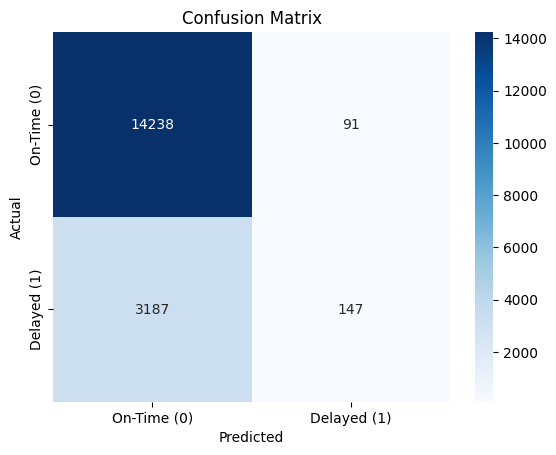

In [103]:
##1st student name: Walgama Eshwarage Don Eshwara - 2782761
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
# Convert predictions to Pandas
pred_pd = lr_prediction_test.select("DEP_DEL15", "prediction").toPandas()

# Generate confusion matrix
cm = confusion_matrix(pred_pd["DEP_DEL15"], pred_pd["prediction"])
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["On-Time (0)", "Delayed (1)"],
            yticklabels=["On-Time (0)", "Delayed (1)"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

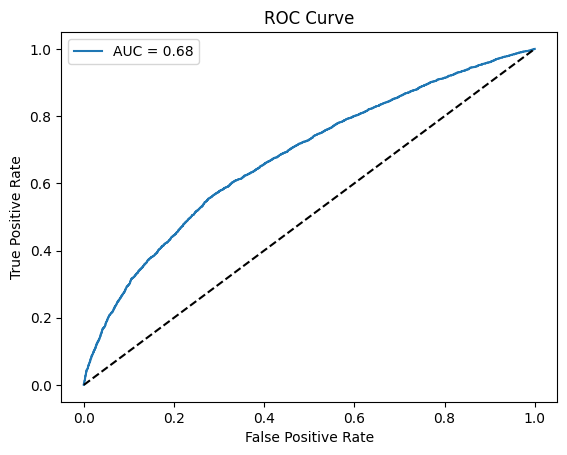

In [104]:
from sklearn.metrics import roc_curve, auc

# Get probability scores for the positive class
y_proba = lr_prediction_test.select("probability").rdd.map(
    lambda x: float(x[0][1])
).collect()
y_true = pred_pd["DEP_DEL15"]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()

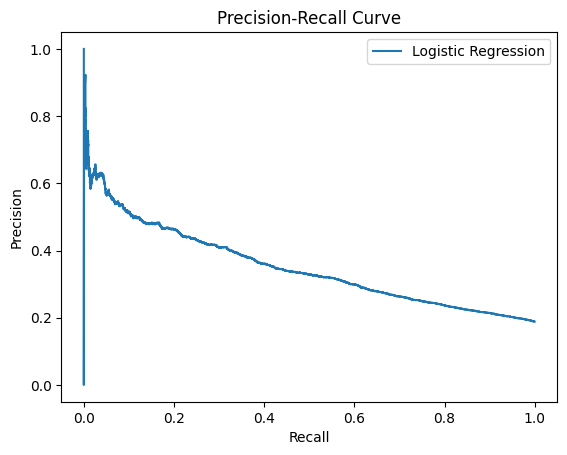

In [105]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_true, y_proba)
plt.plot(recall, precision, label='Logistic Regression')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.show()

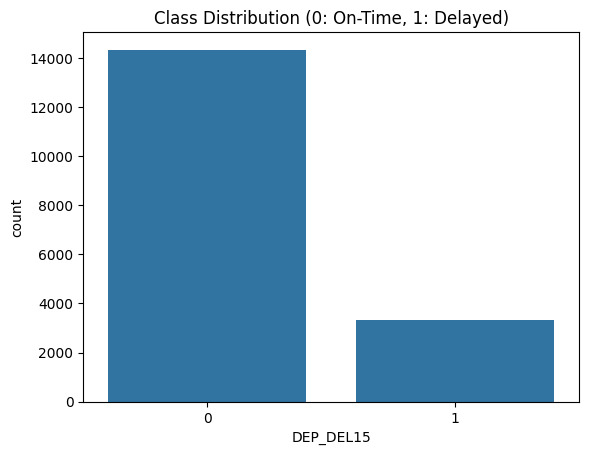

In [106]:
sns.countplot(x="DEP_DEL15", data=pred_pd)
plt.title("Class Distribution (0: On-Time, 1: Delayed)")
plt.show()

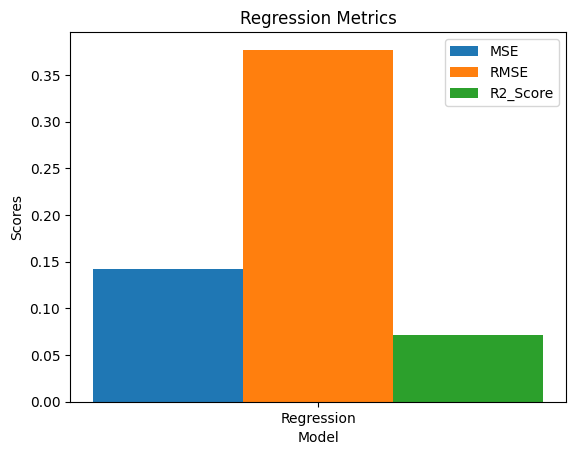

In [107]:
##2nd student name:Safiat Alli-Adeniji 2803147
# plot
import matplotlib.pyplot as plt
import numpy as np

mse = [mse1]
rmse = [rmse1]
r2_score = [r2_score1]

positions = np.arange(len(mse))
bar_width = 0.1

plt.bar(positions - bar_width, mse, width = bar_width, label = 'MSE')
plt.bar(positions, rmse, width = bar_width, label = 'RMSE')
plt.bar(positions + bar_width, r2_score, width = bar_width, label = 'R2_Score')

# adding labels and title
plt.xlabel('Model')
plt.ylabel('Scores')
plt.title('Regression Metrics')

# adding the legend
plt.legend()
plt.xticks(positions, ['Regression'])
plt.show()




---
# **Task 6 - LSEP Considerations (5 marks)**
---

# Student 1: **Type the chosen issue**

add contribution here ...

# Student 2: **Type the chosen issue**

add contribution here ...

# Student 3: **Type the chosen issue**

add contribution here ...

---

# **Task 7 - Convert ipynb to HTML for Turnitin submission [5 marks]**

---



In [108]:
# install nbconvert (if facing the conversion error)
!pip3 install nbconvert

In [109]:
# convert ipynb to html and submit this HTML file
!jupyter nbconvert --to html Group_50_CRWK_CN7030.ipynb

[NbConvertApp] WARNING | pattern 'Group_50_CRWK_CN7030.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp.answer_yes=True]
--ex